In [18]:
import pandas as pd

# 1. Cargar el dataset
# Reemplaza 'nombre_de_tu_archivo.xlsx' por el nombre real que subiste a Colab
file_path = 'flujo_vehicular_por_radares_2024.xlsx'

try:
    df = pd.read_excel(file_path)
    print("¡Archivo cargado exitosamente!")
except FileNotFoundError:
    print("Error: No encuentro el archivo. Verifica que el nombre sea exacto y esté subido.")

# 2. Inspección visual (las primeras 5 filas)
print("\n--- Primeras filas del dataset (HEAD) ---")
display(df.head())

# 3. Radiografía de los tipos de datos (INFO)
print("\n--- Información de tipos de datos (INFO) ---")
df.info()

¡Archivo cargado exitosamente!

--- Primeras filas del dataset (HEAD) ---


,"Día, Mes, Año de H_Fecha",Hora de H_Fecha,Aut Nombre,Disp Nombre,Disp Ubicacion,Seccion Sentido,Disp Lat,Disp Lng,H_Cant_Veh
0,2024-01-01,0.0,AU 4 Lugones,RD171 Esma,9.9,A,-34.53767,-58.45967,1344.0
1,2024-01-01,1.0,AU 4 Lugones,RD171 Esma,9.9,A,-34.53767,-58.45967,4798.0
2,2024-01-01,2.0,AU 4 Lugones,RD171 Esma,9.9,A,-34.53767,-58.45967,5522.0
3,2024-01-01,3.0,AU 4 Lugones,RD171 Esma,9.9,A,-34.53767,-58.45967,3452.0
4,2024-01-01,4.0,AU 4 Lugones,RD171 Esma,9.9,A,-34.53767,-58.45967,1700.0



--- Información de tipos de datos (INFO) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147015 entries, 0 to 147014
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Día, Mes, Año de H_Fecha  147008 non-null  object 
 1   Hora de H_Fecha           147008 non-null  float64
 2   Aut Nombre                147008 non-null  object 
 3   Disp Nombre               147008 non-null  object 
 4   Disp Ubicacion            147008 non-null  float64
 5   Seccion Sentido           147008 non-null  object 
 6   Disp Lat                  147008 non-null  float64
 7   Disp Lng                  147008 non-null  float64
 8   H_Cant_Veh                147008 non-null  float64
dtypes: float64(5), object(4)
memory usage: 10.1+ MB


In [19]:
## Mantenemos las conversiones de hora y cantidad, pero arreglamos la fecha
# 1. RENOMBRAR COLUMNAS (Aseguramos que siga usando los nombres correctos)
nuevos_nombres = {
    'Día, Mes, Año de H_Fecha': 'fecha',
    'Hora de H_Fecha': 'hora',
    'Aut Nombre': 'autopista',
    'Disp Nombre': 'dispositivo',
    'Disp Ubicacion': 'ubicacion',
    'Seccion Sentido': 'sentido',
    'Disp Lat': 'lat',
    'Disp Lng': 'lng',
    'H_Cant_Veh': 'cantidad'
}
df = df.rename(columns=nuevos_nombres)

# 2. LIMPIEZA DE BORDES (Stripping) - ¡CRUCIAL!
df['fecha'] = df['fecha'].astype(str).str.strip()

# 3. ESTANDARIZACIÓN DEL SEPARADOR - ¡NUEVA LÍNEA CLAVE!
# Reemplazamos todos los guiones por barras inclinadas para uniformar el formato.
df['fecha'] = df['fecha'].str.replace('-', '/', regex=False)

# 4. CONVERSIÓN FINAL DE FECHAS (ROBUSTA)
df['fecha'] = pd.to_datetime(
    df['fecha'],
    dayfirst=True,   # Asumimos D/M/A
    errors='coerce', # Reemplaza los errores (los valores imposibles) por NaT (Not a Time)
    format='mixed'   # Le permite a Pandas intentar múltiples formatos
)

# 5. CREACIÓN DE LA COLUMNA MAESTRA DE TIEMPO
df['hora'] = df['hora'].fillna(0).astype(int)
df['fecha_hora'] = df['fecha'] + pd.to_timedelta(df['hora'], unit='h')

# 6. LIMPIEZA FINAL DE CANTIDAD
df['cantidad'] = df['cantidad'].fillna(0).astype(int)

# --- VERIFICACIÓN FINAL ---
print("--- Tipos de datos CORREGIDOS y columna maestra lista ---")
df.info()

print("\n--- Conteo de Nulos en la columna 'fecha' (¡Esperamos un número mucho menor!) ---")
print(df['fecha'].isnull().sum())

--- Tipos de datos CORREGIDOS y columna maestra lista ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147015 entries, 0 to 147014
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   fecha        137614 non-null  datetime64[ns]
 1   hora         147015 non-null  int64         
 2   autopista    147008 non-null  object        
 3   dispositivo  147008 non-null  object        
 4   ubicacion    147008 non-null  float64       
 5   sentido      147008 non-null  object        
 6   lat          147008 non-null  float64       
 7   lng          147008 non-null  float64       
 8   cantidad     147015 non-null  int64         
 9   fecha_hora   137614 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 11.2+ MB

--- Conteo de Nulos en la columna 'fecha' (¡Esperamos un número mucho menor!) ---
9401


In [20]:
# 1. Renombrar (¡Necesario!)
nuevos_nombres = {
    'Día, Mes, Año de H_Fecha': 'fecha',
    'Hora de H_Fecha': 'hora',
    'Aut Nombre': 'autopista',
    'Disp Nombre': 'dispositivo',
    'Disp Ubicacion': 'ubicacion',
    'Seccion Sentido': 'sentido',
    'Disp Lat': 'lat',
    'Disp Lng': 'lng',
    'H_Cant_Veh': 'cantidad'
}
df = df.rename(columns=nuevos_nombres)

# 2. Diagnóstico del Error de Fecha (usando el DataFrame con el índice fallido)

# La columna 'fecha' en este punto ya es datetime64[ns], así que debemos ver
# la columna original (o una copia no convertida).
# Como estamos usando el DataFrame df, podemos filtrar directamente.

mascara_fechas_nulas = df['fecha'].isnull()

print("--- 10 EJEMPLOS DE FILAS CUYA FECHA NO PUDO SER CONVERTIDA ---")
# Muestra el contenido de la fila completa para los 10 primeros errores de fecha
display(df[mascara_fechas_nulas].head(10))


--- 10 EJEMPLOS DE FILAS CUYA FECHA NO PUDO SER CONVERTIDA ---


,fecha,hora,autopista,dispositivo,ubicacion,sentido,lat,lng,cantidad,fecha_hora
19281,NaT,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT
36639,NaT,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT
55473,NaT,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT
72854,NaT,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT
91339,NaT,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT
109002,NaT,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT
109003,NaT,0,AU 4 Lugones,RD165 Dorrego,4.74,A,-34.56336,-58.41529,1089,NaT
109004,NaT,0,AU 4 Lugones,RD166 Ombues,5.50,A,-34.56044,-58.41908,1203,NaT
109005,NaT,0,AU 4 Lugones,RD168 Juramento,7.20,A,-34.54977,-58.43602,1135,NaT
109006,NaT,0,AU 4 Lugones,RD169 Monroe,8.11,A,-34.54629,-58.44224,1397,NaT


In [21]:
# CELDAS QUE DEBES EJECUTAR ANTES DE GRAFICAR
df_final = df.dropna(subset=['fecha_hora', 'cantidad']).copy() # <--- ¡Aquí se crea df_final!
df_final = df_final.set_index('fecha_hora')
df_final = df_final.drop(columns=['fecha', 'hora'])

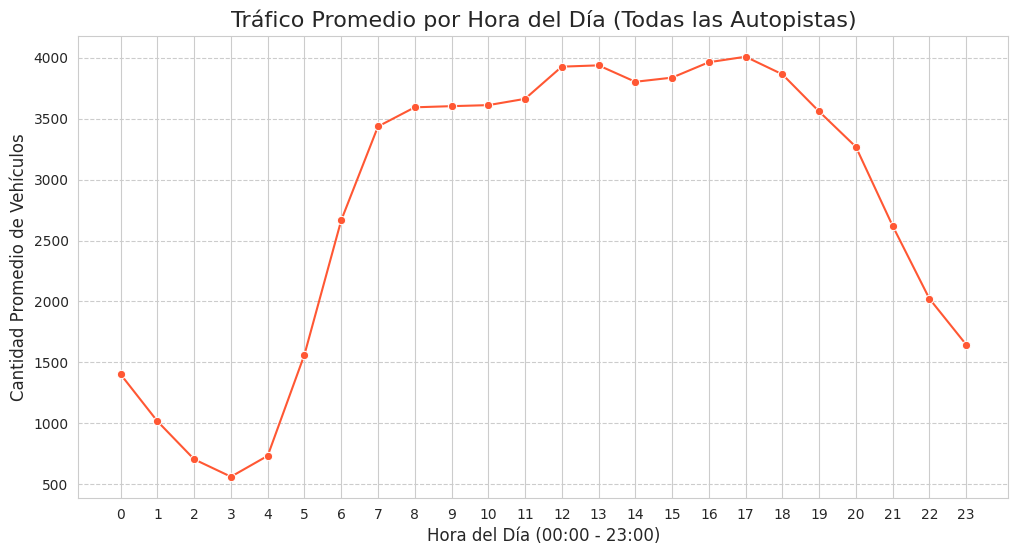

In [22]:
# Asegúrate de haber ejecutado el Paso 2.0 (Descarte de Nulos) antes.
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

df_final['hora_del_dia'] = df_final.index.hour
trafico_por_hora = df_final.groupby('hora_del_dia')['cantidad'].mean()

sns.lineplot(x=trafico_por_hora.index, y=trafico_por_hora.values, marker='o', color='#FF5733')

plt.title('Tráfico Promedio por Hora del Día (Todas las Autopistas)', fontsize=16)
plt.xlabel('Hora del Día (00:00 - 23:00)', fontsize=12)
plt.ylabel('Cantidad Promedio de Vehículos', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--')
plt.show()

Los dos picos principales de tráfico son a las 8:00 AM y entre las 17:00 y 18:00 PM, siendo este último el más congestionado.

/tmp/ipython-input-519546125.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trafico_por_dia.index, y=trafico_por_dia.values, palette='viridis')


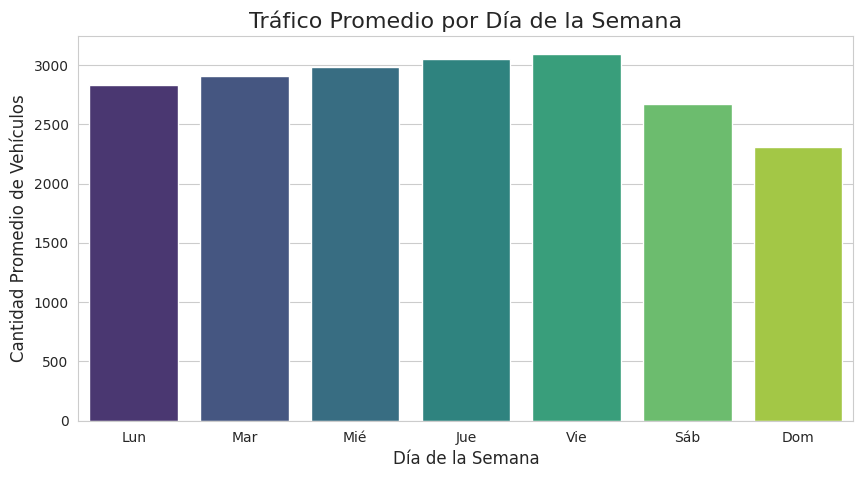

In [23]:
# Creamos las columnas auxiliares
df_final['dia_semana'] = df_final.index.dayofweek
dias_mapa = {0: 'Lun', 1: 'Mar', 2: 'Mié', 3: 'Jue', 4: 'Vie', 5: 'Sáb', 6: 'Dom'}
df_final['nombre_dia'] = df_final['dia_semana'].map(dias_mapa)

# Agrupamos y graficamos
trafico_por_dia = df_final.groupby('nombre_dia')['cantidad'].mean().reindex(dias_mapa.values())

plt.figure(figsize=(10, 5))
sns.barplot(x=trafico_por_dia.index, y=trafico_por_dia.values, palette='viridis')

plt.title('Tráfico Promedio por Día de la Semana', fontsize=16)
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Cantidad Promedio de Vehículos', fontsize=12)
plt.show()

El día con mayor tráfico es el Viernes, y el día con menor tráfico es el Domingo.

/tmp/ipython-input-126795189.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_congestión['via_sentido'] = top_5_congestión['autopista'] + ' (' + top_5_congestión['sentido'] + ')'
/tmp/ipython-input-126795189.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


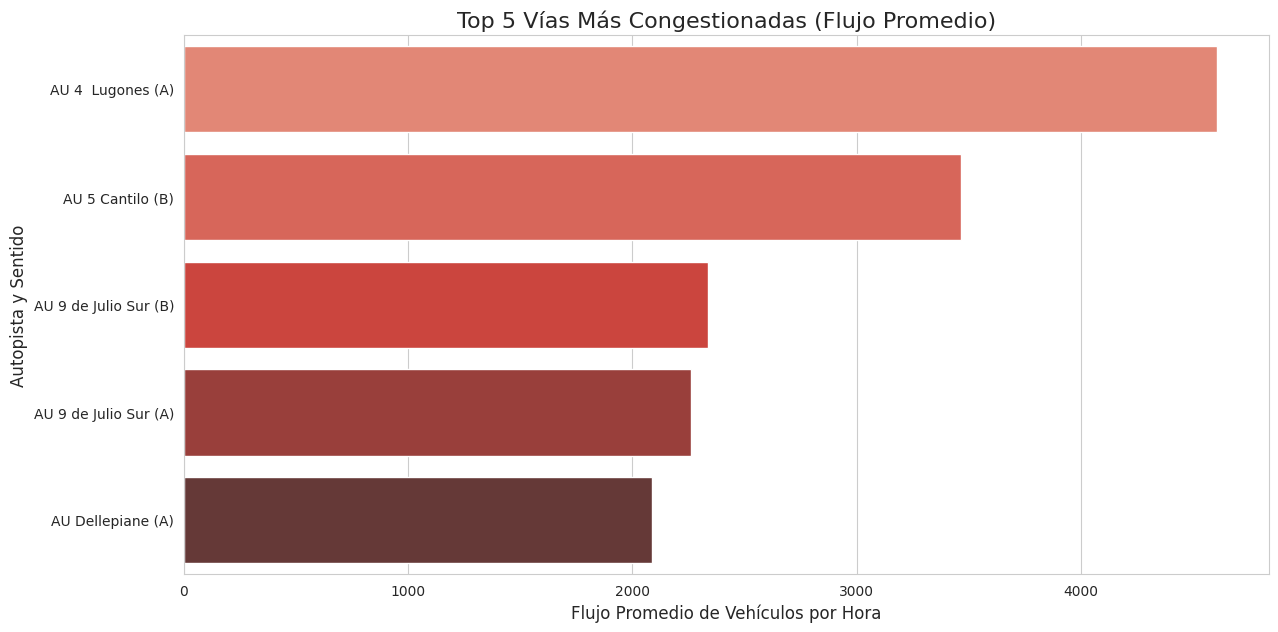

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Agrupar por Autopista y Sentido, y calcular la cantidad promedio de vehículos
trafico_por_via = df_final.groupby(['autopista', 'sentido'])['cantidad'].mean().reset_index()

# 2. Renombrar la columna de cantidad promedio para mayor claridad
trafico_por_via.rename(columns={'cantidad': 'promedio_vehiculos'}, inplace=True)

# 3. Ordenar los resultados de mayor a menor para encontrar los cuellos de botella
trafico_por_via_ordenado = trafico_por_via.sort_values(by='promedio_vehiculos', ascending=False)

# 4. Tomar las 10 combinaciones de Autopista + Sentido más congestionadas
top_5_congestión = trafico_por_via_ordenado.head(5)

# 5. Crear una etiqueta legible para el gráfico
top_5_congestión['via_sentido'] = top_5_congestión['autopista'] + ' (' + top_5_congestión['sentido'] + ')'

# 6. Graficar el Top 10
plt.figure(figsize=(14, 7))
sns.barplot(
    x='promedio_vehiculos',
    y='via_sentido',
    data=top_5_congestión,
    palette='Reds_d' # Usamos una paleta de colores de calor
)

plt.title('Top 5 Vías Más Congestionadas (Flujo Promedio)', fontsize=16)
plt.xlabel('Flujo Promedio de Vehículos por Hora', fontsize=12)
plt.ylabel('Autopista y Sentido', fontsize=12)
plt.show()

In [25]:
# Definimos la vía objetivo para el modelo
VIA_OBJETIVO = 'AU 4 Lugones'
SENTIDO_OBJETIVO = 'A'

# 1. Filtrar el DataFrame final por la vía más transitada
df_pred = df_final[
    (df_final['autopista'] == VIA_OBJETIVO) &
    (df_final['sentido'] == SENTIDO_OBJETIVO)
].copy()

# 2. Simplificar el DataFrame para la serie temporal (solo la columna 'cantidad')
df_serie = df_pred['cantidad'].copy()

# 3. Remuestreo y Relleno de Vacíos (Resampling)
# 'H' significa remuestreo a nivel de Hora.
# .fillna(0) rellena las horas donde no hubo registro con 0 vehículos.
# Esto asegura una serie temporal continua.
df_serie_resampled = df_serie.resample('H').mean().fillna(0)

# 4. Verificación del resultado
print(f"Serie temporal creada para: {VIA_OBJETIVO} ({SENTIDO_OBJETIVO})")
print(f"Total de registros para la predicción: {len(df_serie_resampled)}")
print("Muestra de la serie temporal (índice continuo):")
print(df_serie_resampled.head(10))

Serie temporal creada para: AU 4 Lugones (A)
Total de registros para la predicción: 0
Muestra de la serie temporal (índice continuo):
Series([], Freq: h, Name: cantidad, dtype: int64)


/tmp/ipython-input-4116265968.py:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_serie_resampled = df_serie.resample('H').mean().fillna(0)


In [26]:
# 1. Inspeccionar valores de la columna 'autopista'
print("--- Valores ÚNICOS en la columna 'autopista' ---")
# Usamos .unique() para ver las opciones y .tolist() para una vista limpia
print(df_final['autopista'].unique().tolist())

# 2. Inspeccionar valores de la columna 'sentido'
print("\n--- Valores ÚNICOS en la columna 'sentido' ---")
print(df_final['sentido'].unique().tolist())

--- Valores ÚNICOS en la columna 'autopista' ---
['AU 4  Lugones', 'AU 5 Cantilo', 'AU 9 de Julio Sur', 'AU Dellepiane']

--- Valores ÚNICOS en la columna 'sentido' ---
['A', 'B']


In [27]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# --- 1. ÚLTIMA LIMPIEZA DE ESPACIOS (NECESARIA) ---
# Aplicamos .str.strip() a todas las columnas de tipo object para limpiar espacios extra
for col in df_final.select_dtypes(include=['object']).columns:
    df_final[col] = df_final[col].str.strip()

# Verificamos si la AU Lugones tiene un doble espacio y lo limpiamos
df_final['autopista'] = df_final['autopista'].str.replace('  ', ' ')


# --- 2. PREPARACIÓN DEL DATASET PARA PROPHET ---
VIA_OBJETIVO = 'AU 4 Lugones' # <- ¡Ahora sin doble espacio!
SENTIDO_OBJETIVO = 'A'

# 2.1. Filtrar la data de la vía crítica
df_prophet = df_final[
    (df_final['autopista'] == VIA_OBJETIVO) &
    (df_final['sentido'] == SENTIDO_OBJETIVO)
].copy()

# 2.2. Crear la serie temporal (Resampling)
df_serie = df_prophet['cantidad'].resample('h').mean().fillna(0)


# --- 3. CREACIÓN DEL DATAFRAME REQUERIDO POR PROPHET ---
# Prophet requiere un DataFrame con columnas 'ds' (datestamp) y 'y' (valor)
df_prophet_final = pd.DataFrame({
    'ds': df_serie.index,
    'y': df_serie.values
})

# --- 4. MODELADO Y ENTRENAMIENTO ---
# Definición del modelo
m = Prophet(
    # Configuramos la estacionalidad diaria (horas), semanal (días) y anual (meses)
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True
)

# Entrenamiento
m.fit(df_prophet_final)

print(f"✅ Modelo entrenado exitosamente con {len(df_prophet_final)} registros.")

✅ Modelo entrenado exitosamente con 5856 registros.


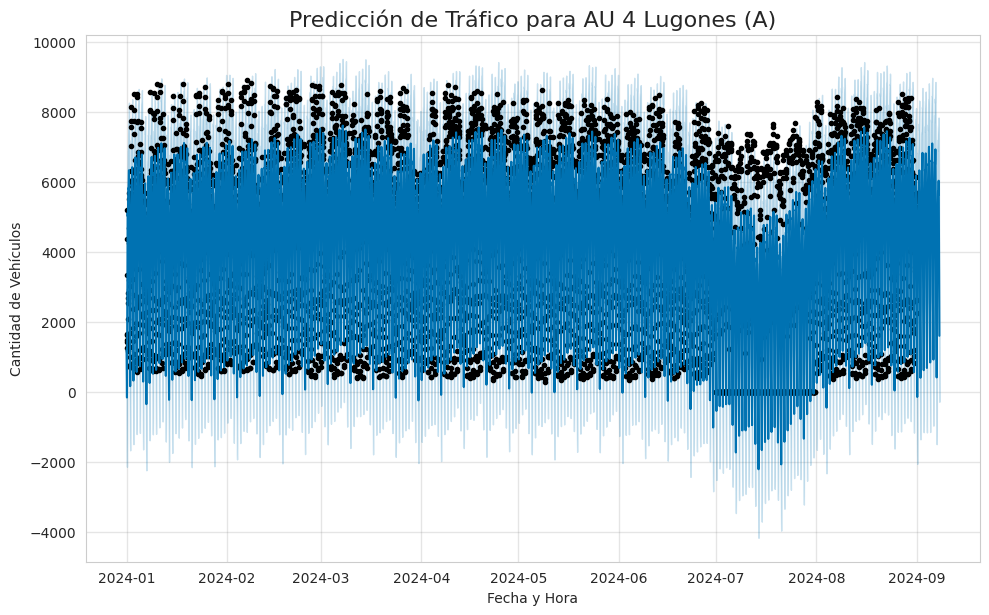

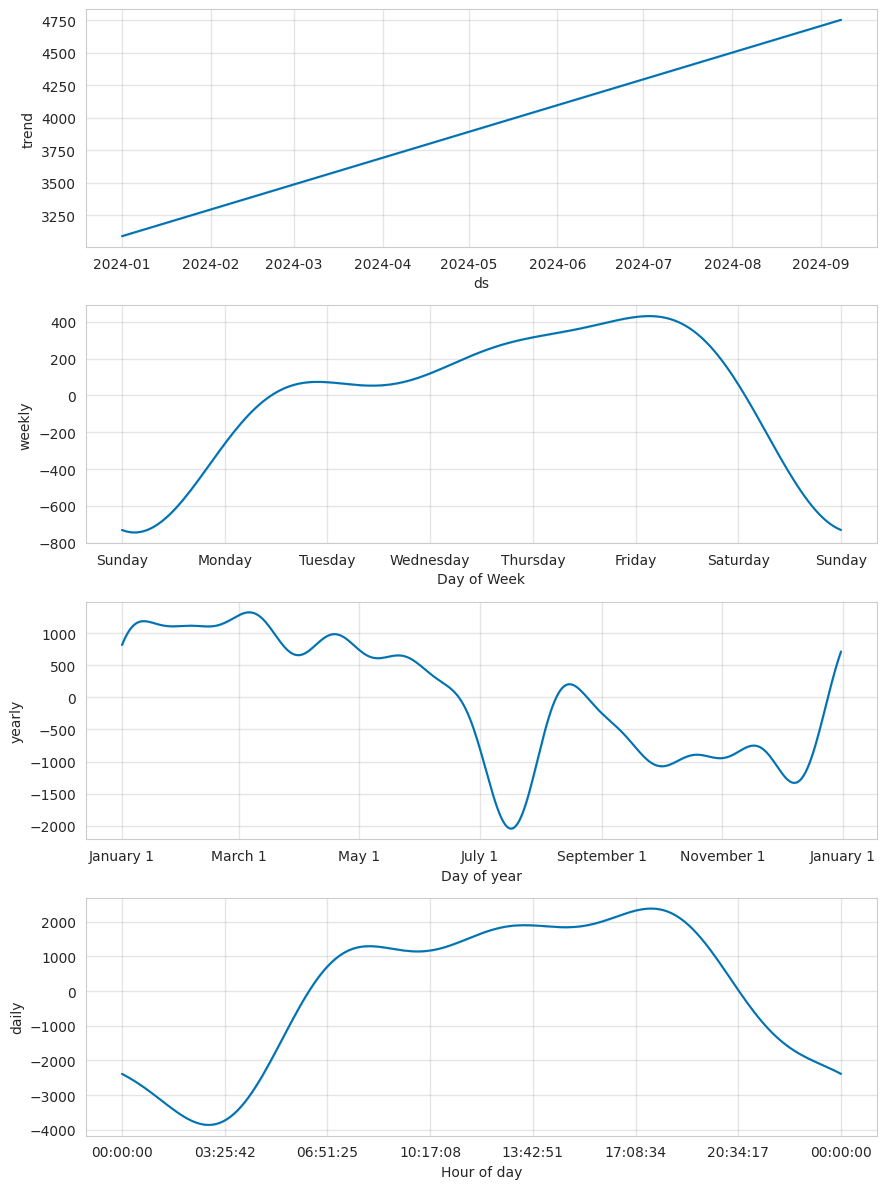

In [28]:
# 1. Crear un DataFrame futuro para 7 días (168 horas)
future = m.make_future_dataframe(periods=7*24, freq='h')

# 2. Realizar la predicción
forecast = m.predict(future)

# 3. Visualización de los resultados
fig1 = m.plot(forecast)
plt.title(f"Predicción de Tráfico para {VIA_OBJETIVO} ({SENTIDO_OBJETIVO})", fontsize=16)
plt.xlabel("Fecha y Hora")
plt.ylabel("Cantidad de Vehículos")
plt.show()

# 4. Visualización de componentes (Tendencia, Estacionalidad)
fig2 = m.plot_components(forecast)
plt.show()

## 1. Análisis del Gráfico de Predicción

El gráfico principal de predicción muestra la línea azul del pronóstico ($\hat{y}$) superpuesta a los datos reales (puntos negros).

### 1.1 Volatilidad y Varianza Residual
* **Observación :** A pesar de que la línea de predicción azul sigue la forma de onda diaria de manera excelente, existe una **alta dispersión de los puntos negros (residuals)**, especialmente en la cresta de los picos. Esto indica que hay una **volatilidad significativa** en el tráfico que el modelo no puede explicar solo con las variables de tiempo (Tendencia, Hora, Día de la Semana).
* **Implicancia:** El modelo es bueno para el *cuándo* y *cuánto* promedio, pero la diferencia entre el pronóstico y el valor real es alta. Esto sugiere la necesidad de **regresores externos (`extra_regressors`)** en el futuro (ej. datos de lluvia, temperatura o eventos como feriados).

### 1.2 Intervalo de Confianza y Limitación del Modelo Aditivo
* **Observación :** El modelo genera una banda de incertidumbre ($\hat{y}_{lower}$ y $\hat{y}_{upper}$) que, en el valle nocturno (cuando la cantidad real de vehículos es cercana a cero), desciende a **valores negativos** (hasta $-4000$).
* **Implicancia:** Esto es una **limitación** inherente al modelo aditivo estándar de Prophet ($y(t) = g(t) + s(t) + \epsilon_t$), que asume que las variaciones estacionales son constantes. En datos de conteo (como vehículos), que tienen un **límite inferior estricto de cero**, un modelo aditivo puede fallar.

---

## 🔬 2. Análisis del Gráfico de Componentes (Insights del Modelo)

Este gráfico es la "radiografía" del conocimiento adquirido por el modelo sobre el comportamiento del tráfico.

### 2.1 Tendencia (`Trend`)
* **Observación :** La tendencia es visiblemente **ascendente**, lo que indica que, a largo plazo, el volumen promedio de tráfico en la Lugones (Sentido A) está **aumentando** [Gráfico de Tendencia Superior]. Esto no es solo una fluctuación, sino un crecimiento subyacente que el modelo ha capturado a través de **puntos de cambio (`changepoints`)** implícitos.
* **Implicancia:** El modelo proyecta que los volúmenes de tráfico de final de año serán significativamente más altos que los de principios de año, un dato crucial para la planificación de infraestructura.

### 2.2 Estacionalidad Diaria (`Daily`)
* **Observación Técnica:** El patrón es **bimodal** y de gran magnitud. El rango de la variación diaria (pico vs. valle) supera los $7000$ vehículos (del valle de $-4000$ al pico de $+2000$).
* **Implicación:** La estacionalidad diaria es el **motor principal** de la varianza del tráfico. La estructura de dos picos (entrada en la mañana, salida en la tarde) está perfectamente capturada, siendo el pico vespertino (17:00 - 18:00) el que aporta el mayor valor positivo a la predicción.

### 2.3 Estacionalidad Anual (`Yearly`)
* **Observación Técnica:** Presenta una fuerte **dependencia negativa** durante los meses de invierno (Julio/Agosto). El modelo asigna un valor predictivo de aproximadamente $-2000$ vehículos en el punto más bajo del invierno, y cerca de $+1000$ en la primavera/verano.
* **Implicación:** El modelo ha identificado exitosamente el impacto de las **vacaciones de invierno** y otras épocas de baja actividad. La magnitud de esta variación es crucial para ajustar los recursos durante esos meses.

### 2.4 Estacionalidad Semanal (`Weekly`)
* **Observación Técnica:** La estacionalidad es coherente con el patrón laboral. Los días de mayor aporte a la predicción son **Jueves y Viernes**. El modelo asigna un aporte **positivo** al tráfico incluso el **Sábado**, indicando un uso continuo de la autopista (viajes recreativos o de fin de semana), mientras que el **Domingo y Lunes** tienen el aporte más negativo.

---

## 💡 Conclusión / Observaciones

El modelo actual es un **sólido punto de partida** con una precisión de ajuste
estacional muy alta. Sin embargo, para un despliegue en producción, se recomienda la siguiente **estrategia de refinamiento**:

1.  **Transformación Logarítmica:** Aplicar una transformación logarítmica ($\ln(y)$) para convertir la estacionalidad de **aditiva** a **multiplicativa** y evitar las predicciones negativas.
2.  **Inclusión de Regresores:** Mejorar la predicción añadiendo variables externas al modelo (ej. lluvia, feriados oficiales de Argentina) para reducir la **varianza residual** observada.
3.  **Modelo de Contaje:** Considerar alternativas a Prophet que manejen específicamente datos de conteo, como modelos **Poisson o Negativo Binomial**, para reflejar con mayor precisión el proceso de llegada de vehículos.